# chainging with langgraph

In [10]:
import os 
from langchain_openai import AzureChatOpenAI
import dotenv

dotenv.load_dotenv()


llm = AzureChatOpenAI(
    openai_api_version=os.getenv("AZURE_OpenAI_API_VERSION_3"),
    azure_deployment=os.getenv('AZURE_OPENAI_DEPLOYMENT_MODEL_3'),
    model_name=os.getenv('AZURE_OPENAI_DEPLOYMENT_MODEL_3'),
    api_key=os.getenv('OPENAI_API_KEY_3'),
    azure_endpoint=os.getenv('AZURE_OpenAI_ENDPOINT_3')
   )

llm.invoke('hello').content

'Hello! How can I assist you today? 😊'

In [25]:
from typing import TypedDict

# Graph state 
class State(TypedDict):
    topic: str 
    joke: str 
    improved_joke: str 
    final_joke: str 

In [26]:
# each call is a different function 

def generate_joke(state:State):
    msg=llm.invoke(f'write a short joke about {state["topic"]}')
    return {'joke':msg.content}

def improved_joke(state:State):
    msg=llm.invoke(f'Make this joke funnier by adding wordplay: {state["joke"]}')
    return {'improved_joke':msg.content}

def polish_joke(state:State):
    msg=llm.invoke(f'add a sarcastic twist to this joke :{state["improved_joke"]}')
    return {'final_joke':msg.content}

def check_punchline(state:State):
    if '?' in state['joke'] or '!' in state['joke']:
        return 'Pass'
    return 'Fail'

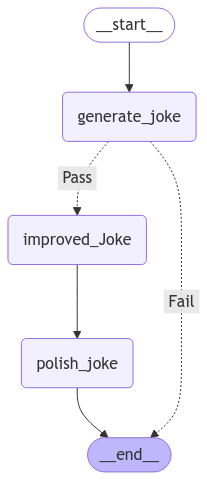

In [ ]:
from langgraph.graph import StateGraph, START, END
from IPython.display import Image, display

workflow=StateGraph(State)

# add nodes 
workflow.add_node('generate_joke',generate_joke)
workflow.add_node('improved_Joke',improved_joke)
workflow.add_node('polish_joke',polish_joke)

workflow.add_edge(START,'generate_joke')
workflow.add_conditional_edges(
    'generate_joke',check_punchline,{'Pass':'improved_Joke','Fail':END}
)
workflow.add_edge('improved_Joke','polish_joke')
workflow.add_edge('polish_joke',END)

graph=workflow.compile()
graph

In [29]:
graph.invoke({'topic':'batman and joker'})

{'topic': 'batman and joker',
 'joke': 'Why did Batman bring a pencil to fight the Joker?\n\nBecause he wanted to draw the line somewhere!',
 'improved_joke': 'Why did Batman bring a pencil to fight the Joker?  \n\nBecause he wanted to draw the line... *and take note* of his shady antics!',
 'final_joke': 'Why did Batman bring a pencil to fight the Joker?  \n\nBecause he wanted to draw the line... and probably doodle a better villain while he was at it.'}